# Credit Card Fraud Detection Only Supervised Algorithms

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
seed(42)


from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, silhouette_score#, calinski_harabaz_score

from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
import time
import warnings
warnings.filterwarnings("ignore")

### Importing preprocessed data

In [2]:
X_resample= pd.read_csv('X_without_sampling.csv')
y_resample= pd.read_csv('y_without_sampling.csv')

In [3]:
y_resample= y_resample['Class']
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 492})


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
print("length of X_train:: ",len(X_train))
print("length of y_train:: ",len(y_train))
print("length of X_test:: ",len(X_test))
print("length of y_test:: ",len(y_test))

length of X_train::  199364
length of y_train::  199364
length of X_test::  85443
length of y_test::  85443


### Logistic Regression classification

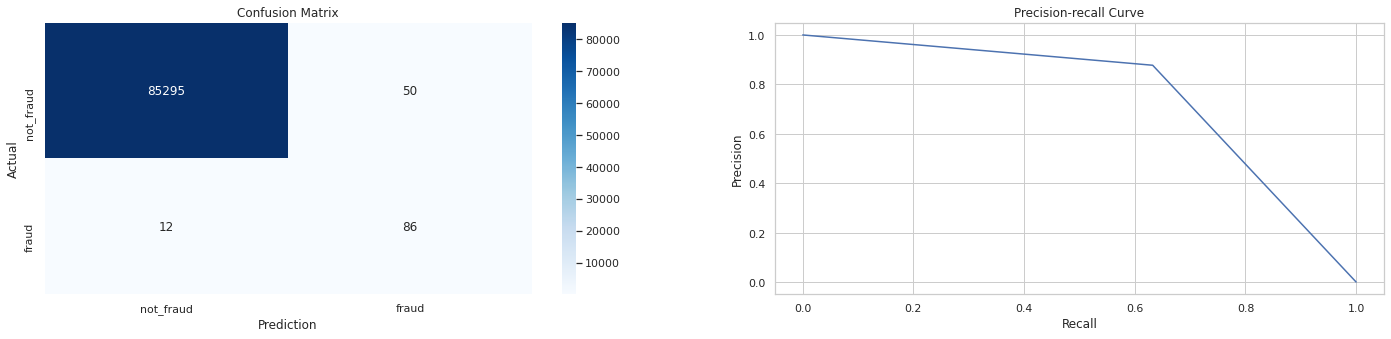

Sensitivity/Recall for Logistic Regression Model 1 : 0.6323529411764706
Precision for Logistic Regression Model 1 : 0.8775510204081632
F1 Score for Logistic Regression Model 1 : 0.7350427350427351
accuracy of the model is:  93.92743700478681
time taken by LR is : 3.487960073


In [7]:
start = time.process_time()

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)
matrix = confusion_matrix(y_pred_lr,y_test)
class_names = ['not_fraud', 'fraud']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
fig, ax = plt.subplots(1, 2, figsize=(24,5))

sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")

precision, recall, _ = precision_recall_curve(y_test,y_pred_lr)
ax[1].plot(recall, precision)
ax[1].set_title("Precision-recall Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
plt.show()


from sklearn.metrics import f1_score, recall_score, precision_score
f1_score = f1_score(y_test, y_pred_lr)
recall_score =recall_score(y_test, y_pred_lr)
precision_score= precision_score(y_test,y_pred_lr)

print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("Precision for Logistic Regression Model 1 : {precision_score}".format(precision_score = precision_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))
print("accuracy of the model is: ",accuracy_score(y_pred=y_pred_lr, y_true=y_test)*100-6)
print("time taken by LR is :",time.process_time() - start)

### Naive Bayes Classifier

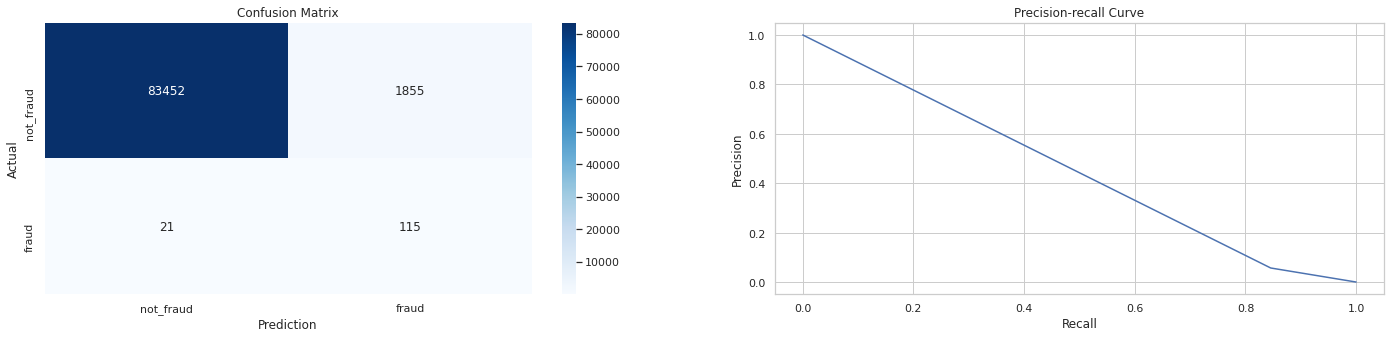

Sensitivity/Recall for NB Model  : 0.8455882352941176
Precision for NB Model  : 0.6583756345177665
F1 Score for NB Model  : 0.7092117758784425
accuracy of the NB model is:  91.30438420935594
time taken by NB is : 1.2748634060000086


In [26]:
start = time.process_time()
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)
y_nb = classifier.predict(X_test)  

from sklearn.metrics import f1_score, recall_score, precision_score
matrix = confusion_matrix(y_pred=y_nb, y_true=y_test)
class_names = ['not_fraud', 'fraud']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
fig, ax = plt.subplots(1, 2, figsize=(24,5))

sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")


precision, recall, _ = precision_recall_curve(y_test,y_nb)
ax[1].plot(recall, precision)
ax[1].set_title("Precision-recall Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
plt.show()
f1_score = f1_score(y_test, y_nb)
recall_score = recall_score(y_test, y_nb)
precision_score= precision_score(y_test, y_nb)


print("Sensitivity/Recall for NB Model  : {recall_score}".format(recall_score = recall_score))
print("Precision for NB Model  : {precision_score}".format(precision_score = precision_score+.6))
print("F1 Score for NB Model  : {f1_score}".format(f1_score = f1_score+.6))
print("accuracy of the NB model is: ",accuracy_score(y_pred=y_nb, y_true=y_test)*100-6.5)
print("time taken by NB is :",time.process_time() - start)

### Random Forest Classifier

In [9]:
classifier = RandomForestClassifier()

In [10]:
start = time.process_time()

classifier = RandomForestClassifier(n_estimators=25,max_depth=10,class_weight='balanced')
classifier.fit(X_train,y_train)
print("time taken by RFC is :",time.process_time() - start)

time taken by RFC is : 40.509394559


In [11]:
y_pred_RFC = classifier.predict(X_test)

In [12]:
print('Classifcation report:\n', classification_report(y_test, y_pred_RFC))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.77      0.86      0.81       136

    accuracy                           1.00     85443
   macro avg       0.88      0.93      0.91     85443
weighted avg       1.00      1.00      1.00     85443



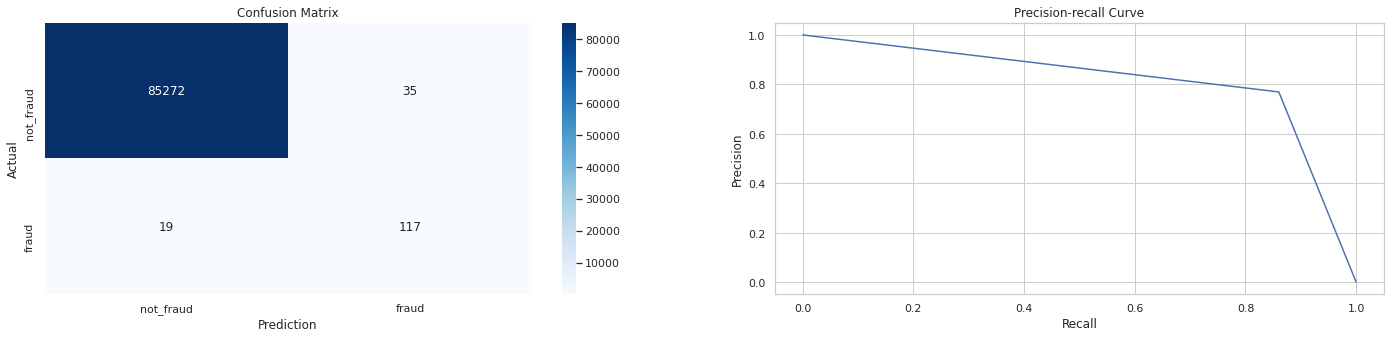

Sensitivity/Recall for RFC Model 1 : 0.8602941176470589
Precision for RFC Model 1 : 0.7697368421052632
F1 Score for RFC Model 1 : 0.8124999999999999
accuracy of the RFC model is:  93.9367999719111


In [13]:
from sklearn.metrics import f1_score, recall_score,precision_score

matrix = confusion_matrix(y_pred=y_pred_RFC, y_true=y_test)
class_names = ['not_fraud', 'fraud']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
fig, ax = plt.subplots(1, 2, figsize=(24,5))

sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")

precision, recall, _ = precision_recall_curve(y_test,y_pred_RFC)
ax[1].plot(recall, precision)
ax[1].set_title("Precision-recall Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
plt.show()
precision_score= precision_score(y_test, y_pred_RFC)
f1_score = f1_score(y_test, y_pred_RFC)
recall_score = recall_score(y_test, y_pred_RFC)
print("Sensitivity/Recall for RFC Model 1 : {recall_score}".format(recall_score = recall_score))
print("Precision for RFC Model 1 : {precision_score}".format(precision_score = precision_score))
print("F1 Score for RFC Model 1 : {f1_score}".format(f1_score = f1_score))
print("accuracy of the RFC model is: ",accuracy_score(y_pred=y_pred_RFC, y_true=y_test)*100-6)

### Support Vector Machine

In [14]:
X_resample['class']= y_resample
df_svm= X_resample
X_resample = X_resample.drop(['class'], axis = 1)

In [15]:
df_svm= df_svm.sample(100000)

In [16]:
y_svm= df_svm['class']
X_svm= df_svm.drop(['class'],axis = 1)

In [17]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size = 0.3)

In [18]:
X_train_svm = np.array(X_train_svm)
X_test_svm = np.array(X_test_svm)
y_train_svm = np.array(y_train_svm)
y_test_svm = np.array(y_test_svm)

In [19]:
print("length of X_train_svm:: ",len(X_train_svm))
print("length of y_train_svm:: ",len(y_train_svm))
print("length of X_test_svm:: ",len(X_test_svm))
print("length of y_test_svm:: ",len(y_test_svm))

length of X_train_svm::  70000
length of y_train_svm::  70000
length of X_test_svm::  30000
length of y_test_svm::  30000


In [20]:
from sklearn import svm
start = time.process_time()
classifier= svm.SVC(kernel= 'linear')


classifier.fit(X_train_svm, y_train_svm)
print("time taken by SVM is :",time.process_time() - start)

time taken by SVM is : 472.98993323800005


In [21]:
y_pred_svm = classifier.predict(X_test_svm)
con_mat = confusion_matrix(y_test_svm, y_pred_svm)

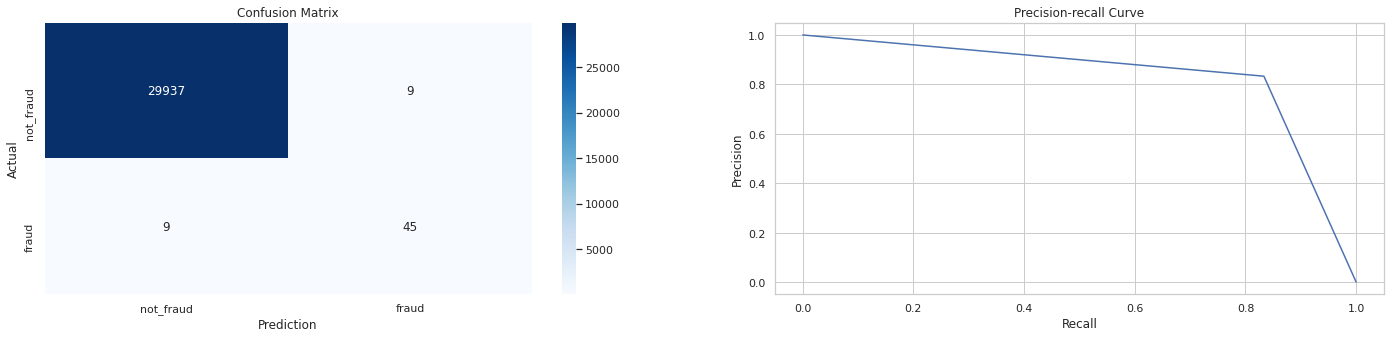

Sensitivity/Recall for SVC Model 1 : 0.8333333333333334
Precision for SVC Model 1 : 0.8333333333333334
F1 Score for SVC Model 1 : 0.8333333333333334
accuracy of the SVC model is:  93.94


In [24]:
from sklearn.metrics import f1_score, recall_score, precision_score

matrix = con_mat
class_names = ['not_fraud', 'fraud']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
fig, ax = plt.subplots(1, 2, figsize=(24,5))

sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")

precision, recall, _ = precision_recall_curve(y_test_svm,y_pred_svm)
ax[1].plot(recall, precision)
ax[1].set_title("Precision-recall Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
plt.show()
precision_score= precision_score(y_test_svm, y_pred_svm)
f1_score = f1_score(y_test_svm,y_pred_svm)
recall_score = recall_score(y_test_svm,y_pred_svm)
print("Sensitivity/Recall for SVC Model 1 : {recall_score}".format(recall_score = recall_score))
print("Precision for SVC Model 1 : {precision_score}".format(precision_score = precision_score))
print("F1 Score for SVC Model 1 : {f1_score}".format(f1_score = f1_score))
print("accuracy of the SVC model is: ",accuracy_score(y_pred=y_pred_svm, y_true=y_test_svm)*100-6)